# Homework 3 Solutions

# Problem 1: MNIST Data Set

In this problem, you will be working with the [MNIST Data Set](http://yann.lecun.com/exdb/mnist/) to extract features, perform classification using the K-Nearest Neighbors algorithm and evaluate your results using metrics such as accuracy, ROC curve and confusion matrices.

The MNIST data set contains $28\times 28$ images of handwritten digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.

The following code cell loads the MNIST data set and displays some examples. 
* Make sure you download the files **"mnist_train.csv"** and **"mnist_test.csv"**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading MNIST data set
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# Loading Training Samples
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
X_train = train_data[:,1:]
y_train = train_data[:,0]

# Loading Test Samples
test_data = np.loadtxt("mnist_test.csv", delimiter=",") 
X_test = test_data[:,1:]
y_test = test_data[:,0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

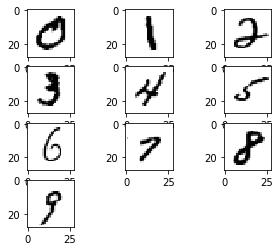

In [3]:
fig = plt.figure(figsize=(5,4))
for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.imshow(X_train[np.where(y_train==i)[0][1],:].reshape((28,28)), cmap='binary')

## Problem 1 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. How many samples are there per class in training and test sets? 
    * Create and print a list that counts the number of class samples in training and test sets.
    * Without changing the training and test sets, comment on the class distribution among training and test sets. 
    * In this question you should address the generalization ability based on the number of examples per class.


2. Normalize each image to have intensity values to range between 0 and 1.


3. Create a PCA structure using ```scikit-learn``` functions and plot the explained variance ratio.
    * How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?


4. Using ```imshow```, plot the first 9 principal components.
    * What is each principal component representing?
    
    
5. Project the input space into a 6-dimensional feature space using **PCA**. Train a k-NN classifier on the projected feature space. 
    * To successfully train your model, you should: (1) choose an evaluation metric, (2) for a set of $k$ values, train the k-NN and evaluate the results in the test set using your chosen metric, (3) pick the $k$ value that maximizes/minimizes your metric (an example of metric is *accuracy*).
   
   
6. For your choice of $k$, do: (1) compute the accuracy in both training and test sets, (2) print the confusion matrix, (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and (5) comment the final results.
    * Comments on the final classification results should include things like: dimensionality of feature space, limitations of PCA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.

7. Create an LDA structure using ```scikit-learn``` functions and plot the explained variance ratio.
    * How many LDA directions would you have to extract in order to explain 90% of the data?
    
8. Project the input space into a 6-dimensional feature space using **LDA**. Train a k-NN classifier on the projected feature space. 
    * To successfully train your model, you should: (1) choose an evaluation metric, (2) for a set of $k$ values, train the k-NN and evaluate the results in  the test set using your chosen metric, (3) pick the $k$ value that maximizes/minimizes your metric (an example of metric is *accuracy*).

9. For your choice of $k$, do: (1) compute the accuracy in both training and test sets, (2) print the confusion matrix, (3) plot the ROC curve for each class including the AUC (area under the curve) in the plot title, (4) plot the ROC for the overall classifier including the AUC (area under the curve) in the plot title, and (5) comment the final results.
    * Comments on the final classification results should include things like: dimensionality of feature space, limitations of LDA, interpretation of the confusion matrix, AUC of each class and overall usability of the model.
    
10. Briefly discuss and compare the performance of both PCA and LDA on the MNIST data set (given the set of experiments you've conducted - questions 1-9).

### Question 1

In [4]:
count_labels = []
count_labels_test = []

for i in range(10):
    count_labels += [np.sum(y_train==i)]
    count_labels_test += [np.sum(y_test==i)]

print(count_labels)
print(count_labels_test)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


There is a good amount of class representation for both training and test set. As long as the training samples have representatives of test samples, a classifier should perform well.

### Question 2

In [5]:
X_train = X_train/255
X_test = X_test/255

### Question 3

In [6]:
from sklearn.decomposition import PCA

f = PCA(n_components=X_train.shape[1])
f.fit(X_train)
# print(f.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

We need  86  components in order to explain 90% of the variance in the data


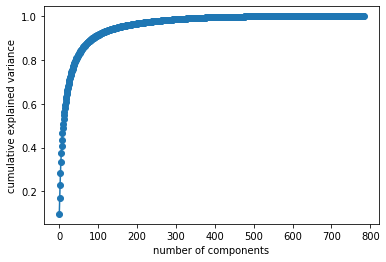

In [7]:
print('We need ',np.where(np.cumsum(f.explained_variance_ratio_)>=0.9)[0][0],
      ' components in order to explain 90% of the variance in the data')

plt.plot(np.cumsum(f.explained_variance_ratio_),'-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Question 4

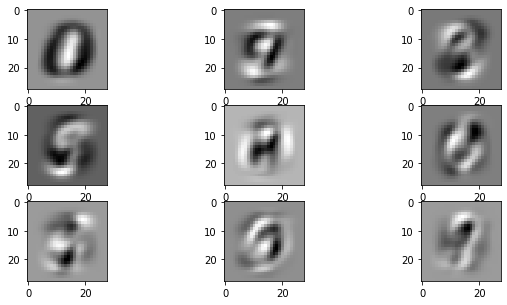

In [8]:
fig = plt.figure(figsize=(10,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(f.components_[i,:].reshape((28,28)),cmap='binary');

Each principal component (PC) explains some amount of variance in the data. The first PC explains the largest amount of variance in the data, 2nd PC the second most variation in the data, and so forth.

### Question 5

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pca = PCA(n_components = 6)
knn = KNeighborsClassifier(metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': np.arange(1,30)}
grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy')

%time grid.fit(X_train, y_train)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 4min 27s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=6, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='euclidean',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                            

In [24]:
print(grid.best_params_)

model = grid.best_estimator_
pred_train = model.predict(X_train) 
pred_test  = model.predict(X_test)

{'knn__n_neighbors': 22}


### Question 6

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
print('Training set Accuracy:', accuracy_score(y_train, pred_train)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test)*100)

Training set Accuracy: 100.0
Test set Accuracy: 84.41


In [27]:
confusion_matrix(y_test, pred_test)

array([[ 928,    0,    7,    2,    4,   20,   11,    0,    8,    0],
       [   0, 1114,    1,    4,    1,    1,    7,    2,    4,    1],
       [  15,    2,  913,   17,   22,    7,   12,    7,   37,    0],
       [   3,   10,   13,  760,    5,   69,    5,   13,  121,   11],
       [   2,    3,   11,    1,  703,    6,   23,   21,    3,  209],
       [  34,    2,    8,   50,   12,  739,   11,   12,   15,    9],
       [  16,    5,   19,    0,   22,   14,  877,    0,    1,    4],
       [   2,   18,   15,    3,   35,    5,    0,  879,   16,   55],
       [  13,    1,   21,   50,   22,   31,    7,    2,  793,   34],
       [  10,    7,    3,    7,  181,   16,    4,   29,   17,  735]],
      dtype=int64)

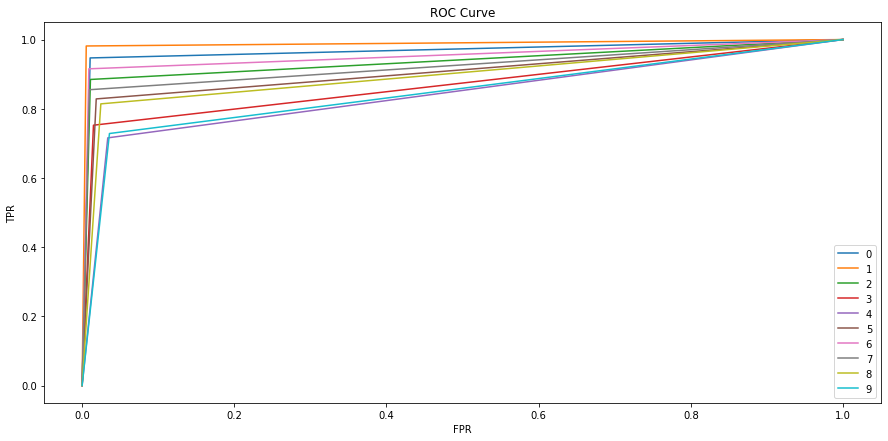

In [46]:
# ROC Curves
from sklearn.metrics import roc_curve

fir = plt.figure(figsize=(15,7))
for i in range(10):
    y_test_binary = 1*(y_test==i)
    pred_test_binary = 1*(pred_test==i)
    fpr, tpr, thresholds = roc_curve(y_test_binary, pred_test_binary)
    lb = ['Digit '+str(i)]
    plt.plot(fpr, tpr, label=str(i))
    plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve');

### Question 7

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

l = LDA(n_components=X_train.shape[1]-1)
l.fit(X_train,y_train)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(784, 10 - 1) = 9 components.
  ChangedBehaviorWarning)
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=783, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

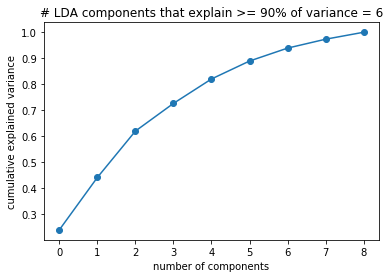

In [50]:
plt.plot(np.cumsum(l.explained_variance_ratio_),'-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('# LDA components that explain >= 90% of variance = '+
          str(np.where(np.cumsum(l.explained_variance_ratio_)>=0.9)[0][0]));

### Question 8

In [51]:
lda = LDA(n_components = 6)
knn = KNeighborsClassifier(metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('lda', lda), ('knn', knn)])

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': np.arange(1,30)}
grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy')

%time grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: V

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Catia\Anacond

Wall time: 18min 27s
{'knn__n_neighbors': 25}


In [53]:
model = grid.best_estimator_
pred_train = model.predict(X_train) 
pred_test  = model.predict(X_test)

### Question 9

In [54]:
print('Training set Accuracy:', accuracy_score(y_train, pred_train)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test)*100)

confusion_matrix(y_test, pred_test)

Training set Accuracy: 100.0
Test set Accuracy: 87.37


array([[ 954,    0,    2,    1,    1,    6,   10,    4,    2,    0],
       [   0, 1100,    3,    4,    0,    1,    3,    2,   19,    3],
       [  10,    7,  924,   16,   10,    4,   17,   19,   20,    5],
       [   2,    2,   25,  845,    0,   64,    1,   19,   45,    7],
       [   1,    1,    4,    0,  883,    1,   13,    1,   19,   59],
       [  11,    4,    5,   73,    9,  690,   10,   11,   71,    8],
       [  14,    4,    8,    1,    7,   18,  898,    0,    7,    1],
       [   3,   14,   18,    8,    5,    0,    0,  908,    6,   66],
       [   6,   21,   15,   52,   25,   95,   14,   14,  712,   20],
       [   9,    2,    1,    7,  111,   14,    1,   29,   12,  823]],
      dtype=int64)

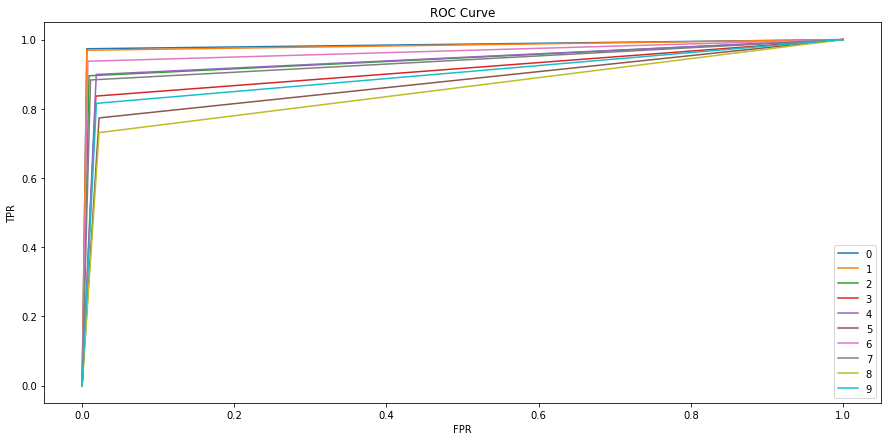

In [55]:
# ROC Curves
from sklearn.metrics import roc_curve

fir = plt.figure(figsize=(15,7))
for i in range(10):
    y_test_binary = 1*(y_test==i)
    pred_test_binary = 1*(pred_test==i)
    fpr, tpr, thresholds = roc_curve(y_test_binary, pred_test_binary)
    lb = ['Digit '+str(i)]
    plt.plot(fpr, tpr, label=str(i))
    plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve');

### Question 10

Applying LDA instead of PCA to reduce the dimensionality of the feature space resulted in a better accuracy performance in the test set.

# Problem 2: Iris Data Set

In this problem, you will be working with the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris).

The IRIS data set contains 4 feature descriptors (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm) to characterize 3 species of Iris plants (class labels 0 - [Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa), 1 - [Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor), and 2- [Iris Virginica](https://en.wikipedia.org/wiki/Iris_virginica)). The IRIS data set contains 150 samples each with 4 attributes/features.

The following code cell loads the IRIS data set.

In [56]:
from sklearn.datasets import load_iris

In [57]:
data = load_iris(return_X_y = False)

X = data.data
y = data.target

X.shape, y.shape, np.unique(y), data.target_names

((150, 4),
 (150,),
 array([0, 1, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [58]:
# Uncomment the following code line to print a data set description
#print(data.DESCR)

## Problem 2 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. Split the data randomly into training and test sets in an 80/20 split.
    * You may use the ```train_test_split``` function from ```scikit-learn```.

2. Plot the explained variance ratio of PCA projections in the training set.
     * How many principal components would you have to extract in order to preserve 90% of the explained variance in the data?

3. Plot the explained variance ratio of LDA projections in the training set.
     * How many LDA rojections would you have to extract in order to explain 90% of the data?

4. Project the both training and test sets into a 1-dimensional space using both PCA and LDA. Plot each 1-D projection for both PCA and LDA in a separate plot. Each class should have a different color and marker symbol. Plot should contain axis labels and legend.
    * You may want to plot the y-axis at a constant value, for example 0 (use the function ```np.zeros```).
    
5. Comment on the observations between the 1-D projections for both PCA and LDA.
    * To aid your discussion, compute the mean and variance of each class in the 1-D space.
    
6. Train a $K$-Nearest Neighbor classifier with $K=5$ neighbors using features created with PCA and LDA. Compute the accuracy in training and test, print the confusion matrices and compute the precision and recall (you may use the function ```precision_recall_fscore_support``` from ```scikit-learn```).
    * Which model performed the best? And why?
    * Make sure to comment on all computed measures.
    
7. What happens as you increase the number of neighbors $K$? decrease the number of neighbors $K$?

### Problem 1

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Problem 2

In [60]:
from sklearn.decomposition import PCA

f = PCA(n_components=X_train.shape[1])
f.fit(X_train)
print(f.explained_variance_ratio_)

[0.92848323 0.04764372 0.01931005 0.004563  ]


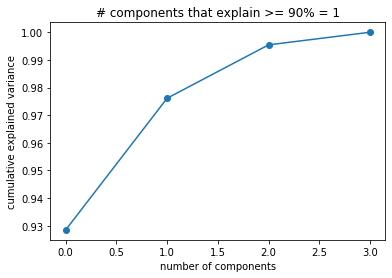

In [62]:
plt.plot(np.cumsum(f.explained_variance_ratio_),'-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('# components that explain >= 90% = '+
          str(np.where(np.cumsum(f.explained_variance_ratio_)>=0.9)[0][0]+1));

The first PCA component explain ~92% of the variance in the data. So we need to project onto that one component only.

### Problem 3

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

f = LDA(n_components=2)
f.fit(X_train, y_train)
print(f.explained_variance_ratio_)

[0.9909754 0.0090246]


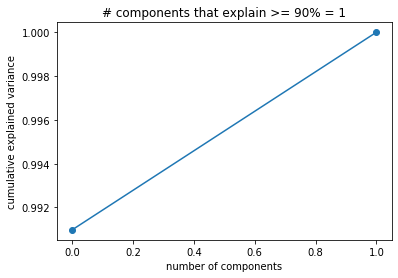

In [77]:
plt.plot(np.cumsum(f.explained_variance_ratio_),'-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('# components that explain >= 90% = '+
          str(np.where(np.cumsum(f.explained_variance_ratio_)>=0.9)[0][0]+1));

The first componened of LDA explain ~99% of the data.

### Problem 4

In [83]:
pca = PCA(1)
pca.fit(X_train)
Xtrain_pca = pca.fit_transform(X_train)
Xtrain_pca.shape

(120, 1)

In [84]:
lda = LDA(n_components=1)
lda.fit(X_train, y_train)
Xtrain_lda = lda.fit_transform(X_train, y_train)
Xtrain_lda.shape

(120, 1)

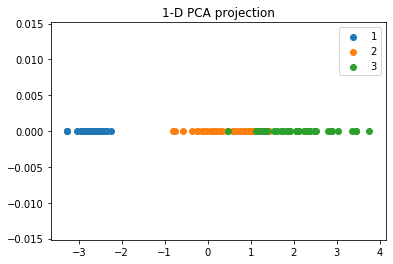

In [88]:
for i in range(3):
    plt.scatter(Xtrain_pca[y_train==i,0], np.zeros(np.size(Xtrain_pca[y_train==i,0])),label=str(i+1))
plt.legend()
plt.title('1-D PCA projection');

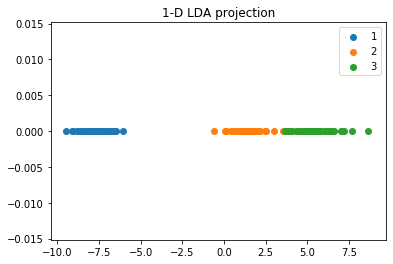

In [89]:
for i in range(3):
    plt.scatter(Xtrain_lda[y_train==i,0], np.zeros(np.size(Xtrain_lda[y_train==i,0])),label=str(i+1))
plt.legend()
plt.title('1-D LDA projection');

### Problem 5

From these plots we can see that LDA projection has less overlapping area than PCA. Furthermore, each 1-D class cluster is further apart from each other and with a smaller variance.

This is happening because LDA is a supervised algorithm that projects the data to a space that maximizes class separability, whereas PCA projects the data onto a space that explains the most variance.

In [90]:
# Compute sample mean and sample variance of each class cluster for PCA projection

print(Xtrain_pca[y_train==0,0].mean(), Xtrain_pca[y_train==0,0].var())
print(Xtrain_pca[y_train==1,0].mean(), Xtrain_pca[y_train==1,0].var())
print(Xtrain_pca[y_train==2,0].mean(), Xtrain_pca[y_train==2,0].var())

-2.7053578656724766 0.04775991773328968
0.4507380720572181 0.3608257382496095
2.0189010930706703 0.5056142294347685


In [91]:
# Compute sample mean and sample variance of each class cluster for LDA projection

print(Xtrain_lda[y_train==0,0].mean(), Xtrain_lda[y_train==0,0].var())
print(Xtrain_lda[y_train==1,0].mean(), Xtrain_lda[y_train==1,0].var())
print(Xtrain_lda[y_train==2,0].mean(), Xtrain_lda[y_train==2,0].var())

-7.689967810995133 0.6205840260958185
1.5128925457396618 1.0887185751777846
5.5439027371918845 1.1935144477428425


### Problem 6

In [109]:
from sklearn.metrics import precision_recall_fscore_support

In [122]:
print('Evaluating results using PCA for dimensionality reduction')
pca = PCA(n_components = 1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])
model = pipe.fit(X_train, y_train);

pred_train_pca = model.predict(X_train) 
pred_test_pca  = model.predict(X_test)

print('Training set Accuracy:', accuracy_score(y_train, pred_train_pca)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test_pca)*100)

print(confusion_matrix(y_test, pred_test_pca))

precision_recall_fscore_support(y_test, pred_test_pca)

Evaluating results using PCA for dimensionality reduction
Training set Accuracy: 100.0
Test set Accuracy: 96.66666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6], dtype=int64))

In [123]:
print('Evaluating results using LDA for dimensionality reduction')
lda = LDA(n_components = 1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('lda', lda), ('knn', knn)])
model = pipe.fit(X_train, y_train);

pred_train_lda = model.predict(X_train) 
pred_test_lda  = model.predict(X_test)

print('Training set Accuracy:', accuracy_score(y_train, pred_train_lda)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test_lda)*100)

confusion_matrix(y_test, pred_test_lda)

precision_recall_fscore_support(y_test, pred_test_lda)

Evaluating results using LDA for dimensionality reduction
Training set Accuracy: 100.0
Test set Accuracy: 100.0


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6], dtype=int64))

Performing LDA to reduce dimensionality of the feature space followed by $k$-NN has retrieve better results as expected from earlier plots.

### Problem 7

As the number of $k$ increases, classes that have more samples will start to take over. To avoid this issue, we can weigh the distance of each point by the inverse of that distance. So (training) points that are closer to a test sample will weigh more towards that test sample's label assignment.

The parameter ```weights``` in the ```KNeighborsClassifier``` classifier can be adjusted to add this weighting. In particular, ```weights='distance'```.

# Problem 3 - Breast Cancer Data Set

In this problem, you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer).

The Breast Cancer data set contains 30 feature descriptors (mean, standard error, and "worst" or largest of radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension) to characterize cell types as benign (class 1) or malignant (class 0). The Breast Cancer data set contains 569 samples each with 30 attributes/features.

The following code cell loads the Breast Cancer data set.

In [124]:
from sklearn.datasets import load_breast_cancer

In [125]:
data = load_breast_cancer(return_X_y=False)

X = data.data
y = data.target

X.shape, y.shape, np.unique(y), data.target_names

((569, 30), (569,), array([0, 1]), array(['malignant', 'benign'], dtype='<U9'))

In [126]:
# Uncomment the following code line to print a data set description
# print(data.DESCR)

## Problem 3 Questions

To receive full marks in this assignment, address the following questions and implementation steps:

1. Suppose you are performing classification using the k-NN algorithm. Would you be able to perform feature selection using L1-norm penalty? Why?

2. Run Sequential Backward Selection (SBS) on the provided data set. (You may use the code for SBS presented in lecture 7.)
    * How many (and which) features will you keep?
    
3. Run the k-NN classifier on the selected features. Report the results in the test set using accuracy measure and confusion matrix.
    * Split the data into training and test using a 80/20 split respectively.

4. Compare the results when using all 30 features versus the selected features. What do you observe?

### Problem 1

We can perform feature selection using L1-norm penalty if our "model" choice is $k$-NN. $k$-NN is a non-parametric algorithm and therefore we cannot describe as a function of parameters.

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

### Problem 2

In [148]:
from sklearn.base import clone
from itertools import combinations

In [149]:
# Source: "Python Machine Learning" by Sebastian Raschka

class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)

sbs.fit(X, y);

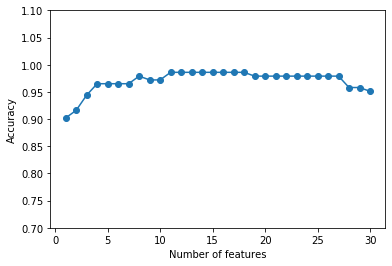

In [151]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features');

In [156]:
# Finds the index location for the first largest accuracy

idx = np.where(sbs.scores_ == np.max(sbs.scores_))[0][-1]
print(idx)

19


In [157]:
print('Retrieved Accuracy: ',sbs.scores_[idx]*100, '%')

Retrieved Accuracy:  98.6013986013986 %


In [158]:
print('Set of features: ', sbs.subsets_[idx])
print('Feature Names: ', data.feature_names[list(sbs.subsets_[idx])])

Set of features:  (0, 2, 4, 7, 8, 10, 11, 12, 14, 15, 21)
Feature Names:  ['mean radius' 'mean perimeter' 'mean smoothness' 'mean concave points'
 'mean symmetry' 'radius error' 'texture error' 'perimeter error'
 'smoothness error' 'compactness error' 'worst texture']


I will keep 11 features as that is the number of features needed to retrieve the largest accuracy possible (~ 98.6%) for **standardized** data set. These 11 features are listed in the output code cell below.

In [164]:
X_subset = X[:,list(sbs.subsets_[idx])]

X_subset.shape

(569, 11)

### Problem 3

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=1)

In [166]:
knn = KNeighborsClassifier(metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('knn', knn)])

In [167]:
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': np.arange(1,30)}
grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy')

%time grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 393 ms
{'knn__n_neighbors': 3}


In [168]:
model = grid.best_estimator_
pred_train = model.predict(X_train) 
pred_test  = model.predict(X_test)

print('Training set Accuracy:', accuracy_score(y_train, pred_train)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test)*100)

confusion_matrix(y_test, pred_test)

Training set Accuracy: 100.0
Test set Accuracy: 93.85964912280701


array([[38,  4],
       [ 3, 69]], dtype=int64)

### Problem 4

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [176]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean',weights='distance')
pipe = Pipeline(steps=[('knn', knn)])
model = pipe.fit(X_train, y_train);

In [177]:
pred_train = model.predict(X_train) 
pred_test  = model.predict(X_test)

print('Training set Accuracy:', accuracy_score(y_train, pred_train)*100)
print('Test set Accuracy:', accuracy_score(y_test, pred_test)*100)

confusion_matrix(y_test, pred_test)

Training set Accuracy: 100.0
Test set Accuracy: 94.73684210526315


array([[36,  6],
       [ 0, 72]], dtype=int64)